In [66]:
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D 

In [116]:
def f(x):
    out = np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
    return out

In [170]:
# начальные точки
p1 = (-3,-6)
p2 = (-6,-7)
p3 = (-5,-4)

# найдем good, best & worst
def find_best(p1, p2, p3):
    adict = {p1 : f(p1), p2 : f(p2), p3 : f(p3)}
    points = sorted(adict.items(), key = lambda x: x[1])

    b = points[0][0]
    g = points[1][0]
    w = points[2][0]
    
    return b, g, w

b, g, w = find_best(p1, p2, p3)

print(b)
print(g)
print(w)

(-5, -4)
(-3, -6)
(-6, -7)


In [171]:
def draw(f, b, g, w, delta = 0.05):
    x = np.arange(-8,0, delta)
    y = np.arange(-8,0, delta)
    X, Y = np.meshgrid(x, y)
    Z = f([X,Y])
    
    x_sc = [b[0], g[0], w[0]]
    y_sc = [b[1], g[1], w[1]]
    text_sc = ['b', 'g', 'w']
    
    x_line = x_sc
    y_line = y_sc
    x_line.append(b[0])
    y_line.append(b[1])
    
    fig, ax = plt.subplots(figsize=(10, 10))
    CS = ax.contourf(X, Y, Z)
    
    ax.scatter(x_sc, y_sc, c = 'r', edgecolors = 'r', linewidths = 4)
    for i in range(3):
        ax.annotate(text_sc[i], (x_sc[i] + 0.2, y_sc[i] + 0.2), fontsize = 17)
        
    line = Line2D(x_sc, y_sc, c = 'r')
    ax.add_line(line)
        
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

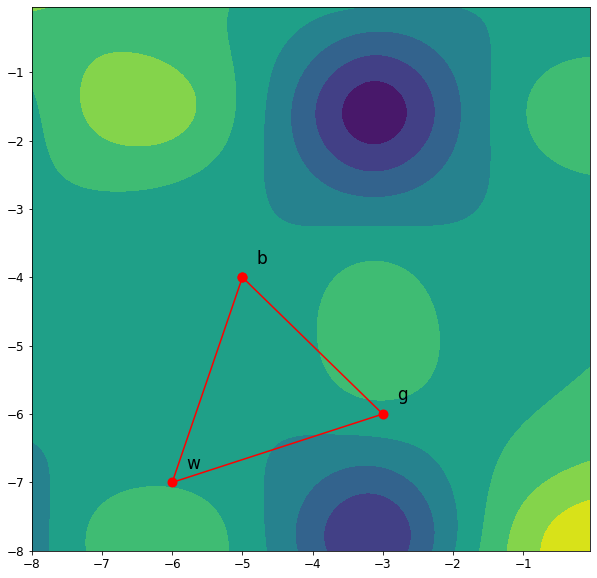

In [172]:
draw(f, b, g, w)

In [173]:
def get_mid(b, g):
    return ((b[0] + g[0])/2, (b[1] + g[1])/2)

def get_reflected(w, mid, alpha = 1):
    x_r = mid[0] + alpha * (mid[0] - w[0])
    y_r = mid[1] + alpha * (mid[1] - w[1])
    return (x_r, y_r)

def get_expanded(w, mid, beta = 2):
    x_e = mid[0] + beta * (mid[0] - w[0])
    y_e = mid[1] + beta * (mid[1] - w[1])
    return (x_e, y_e)

def get_contracted(w, mid, gamma = 0.5):
    x_c = mid[0] + gamma * (mid[0] - w[0])
    y_c = mid[1] + gamma * (mid[1] - w[1])
    return (x_c, y_c)

In [174]:
mid = get_mid(b, g)
refl = get_reflected(w, mid)

print(refl)

(-2.0, -3.0)


In [175]:
def draw_with_refl(f, b, g, w, mid, refl, delta = 0.05):
    x = np.arange(-8,0, delta)
    y = np.arange(-8,0, delta)
    X, Y = np.meshgrid(x, y)
    Z = f([X,Y])
    
    x_sc = [b[0], g[0], w[0]]
    y_sc = [b[1], g[1], w[1]]
    text_sc = ['b', 'g', 'w']
    
    x_line = x_sc
    y_line = y_sc
    x_line.append(b[0])
    y_line.append(b[1])
    
    fig, ax = plt.subplots(figsize=(10, 10))
    CS = ax.contourf(X, Y, Z)
    
    # рисуем вершины симплекса
    ax.scatter(x_sc, y_sc, c = 'r', edgecolors = 'r', linewidths = 4)
    for i in range(3):
        ax.annotate(text_sc[i], (x_sc[i] + 0.2, y_sc[i] + 0.2), fontsize = 17)
    
    # рисуем ребра симплекса
    line = Line2D(x_sc, y_sc, c = 'r')
    ax.add_line(line)
    
    # рисуем mid
    ax.scatter(mid[0], mid[1], c = 'b', edgecolors = 'b', linewidths = 4)
    ax.annotate('mid', (mid[0] + 0.2, mid[1]), fontsize = 17)
    
    # рисуем refl
    ax.scatter(refl[0], refl[1], c = 'k', edgecolors = 'k', linewidths = 4)
    ax.annotate('refl', (refl[0] + 0.2, refl[1]), fontsize = 17)
    
    # рисуем вектор от w до refl
    line = Line2D([w[0], refl[0]], [w[1], refl[1]], c = 'k', linestyle = '--')
    ax.add_line(line)
        
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

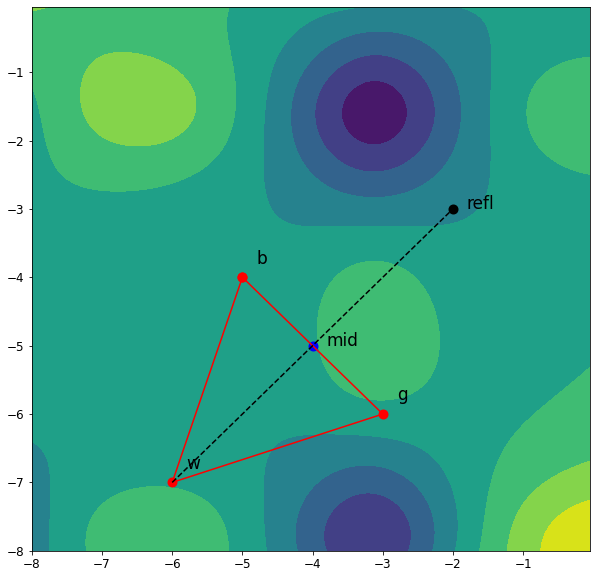

In [176]:
draw_with_refl(f, b, g, w, mid, refl)

In [181]:
# количество итераций
N = 10

p1 = (-4,-6)
p2 = (-6,-7)
p3 = (-5,-4)

print('Best point after')

for i in range(N):
    
    b1, g1, w1 = find_best(p1, p2, p3)
    b = [b1[0], b1[1]]
    g = [g1[0], g1[1]]
    w = [w1[0], w1[1]]
    
    mid = get_mid(b, g)

    refl = get_reflected(w, mid)
    
    if f(refl) < f(g):
        w = refl
    else:
        if f(refl) < f(w):
            w = refl
        c = [(w[0] + mid[0])/2, (w[1] + mid[1])/2]
    
        if f(c) < f(w):
            w = c
    
    if f(refl) < f(b):
        
        #expansion
        exp = get_expanded(w, mid)
        if f(exp) < f(refl):
            w = exp
        else:
            w = refl
    if f(refl) > f(g):
        
        # contracion
        cont = get_contracted(w, mid)
        if f(cont) < f(w):
            w = cont
    
    best = b
    print("iteration", i, ":", best)
    
    # update points
    p1 = (w[0], w[1])
    p2 = (g[0], g[1])
    p3 = (b[0], b[1])
    
    
print()    
print("Result of Nelder-Mead algorithm")
print("Best poits is:", best)

Best point after
iteration 0 : [-5, -4]
iteration 1 : [-3.0, -3.0]
iteration 2 : [-4.0, -1.0]
iteration 3 : [-2.75, -1.0]
iteration 4 : [-3.1875, -2.0]
iteration 5 : [-2.7109375, -1.625]
iteration 6 : [-2.849609375, -1.40625]
iteration 7 : [-2.98388671875, -1.7578125]
iteration 8 : [-3.12255859375, -1.5390625]
iteration 9 : [-3.12255859375, -1.5390625]

Result of Nelder-Mead algorithm
Best poits is: [-3.12255859375, -1.5390625]
